In [26]:
# Importing Libraries for my work

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
# Loading my data set

dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')
# Checking TOP 5 rows 
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#Checking if I got any NULL Values
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
#Datatype is  either 'float64' or 'int64' which works well while feeded to an algorithm.
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# dataset.describe() is a method that I'm using on my pd DataFrame  to get a summary of the descriptive statistics for each column in the dataset.
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
# dataset.corr() is  a method I'm using  on my pandas DataFrame (dataset is the name of my DataFrame) 
#to calculate the correlation between all pairs of numerical columns in the dataset.
corr_matrix = dataset.corr()

corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Text(0.5, 1.0, 'Correlation Plot of the Heat Failure Prediction')

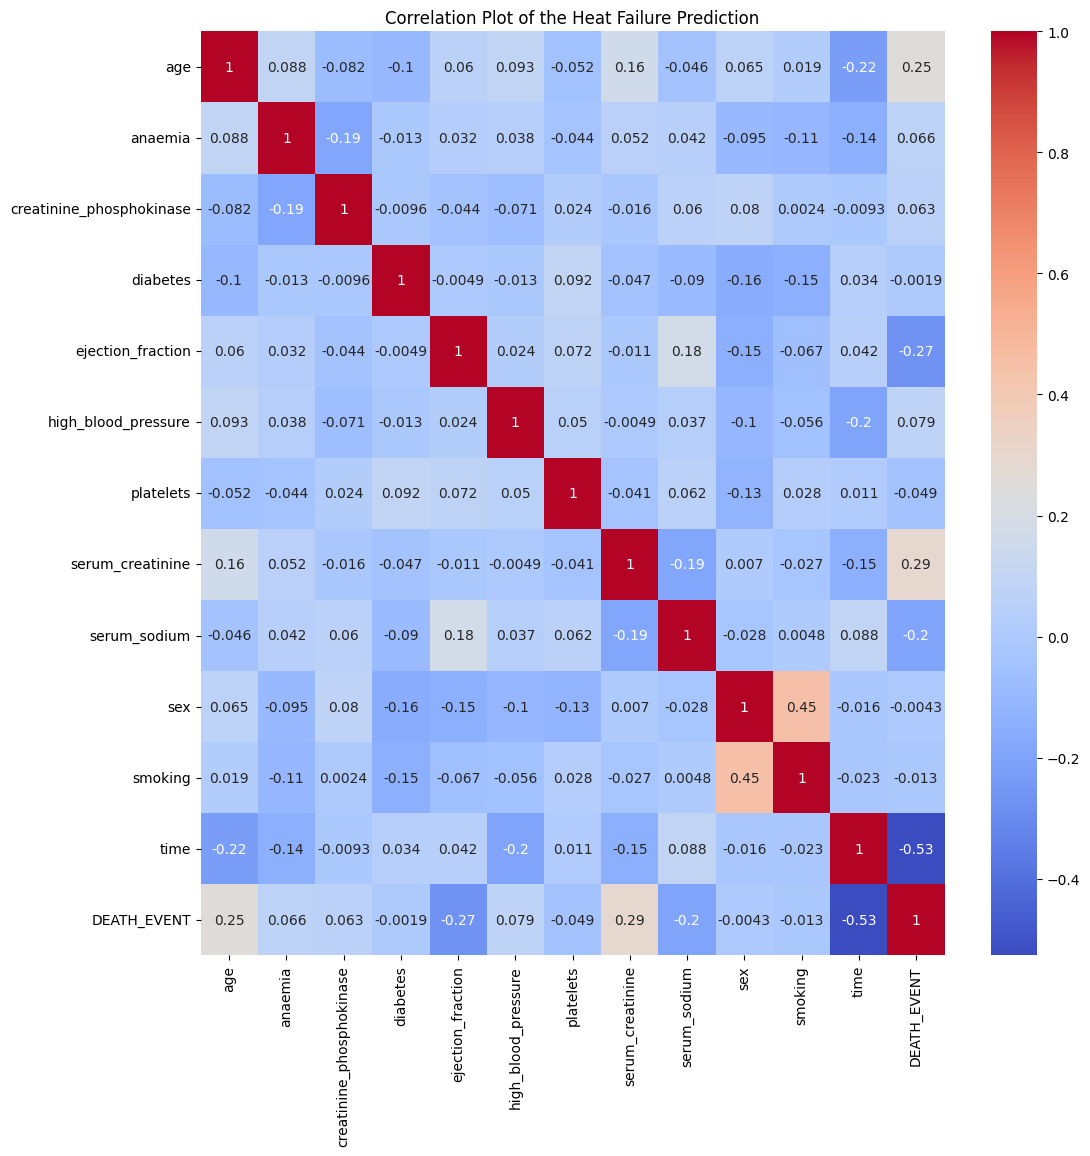

In [7]:
plt.figure(figsize=(12,12))
# sns.heatmap() is a function from the seaborn library that I used to create a heatmap visualization of a correlation matrix.
# this way it's easier to assume what columns I will need to use in my ANN model later on.
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Plot of the Heat Failure Prediction")

In [25]:
# Notes after my Correlation Plot of the Heat Failure Prediction:

# 1. Time is the most important feature as it would've been very crucial to get diagnosed early with heart issue so as to get timely treatment.This will reduce the chances of any fatality.

# 2. serum_creatinine is the next important feature as serum's (essential component of blood) when we got it plenty in our blood makes it easier for heart to function.

# 3. ejection_fraction has also significant influence on target variable which is expected since it is basically the efficiency of the heart.

In [114]:
# These two lines of code are used to extract the independent variables (features) and the dependent variable (target) from a pandas DataFrame called dataset.

#The first line of code, X = dataset.iloc[:, 3:-1].values, creates a new NumPy array called X that contains the values of all rows in the dataset DataFrame, but only for columns 3 through the second-to-last column.
X = dataset.iloc[:, 3:-1].values
#The second line of code, y = dataset.iloc[:, -1].values, creates a new NumPy array called y that contains the values of all rows in the dataset DataFrame, but only for the last column. This line of code selects the last column of the DataFrame (i.e., the TARGET variable)
y = dataset.iloc[:, -1].values

In [115]:
#These lines of code use the train_test_split function from the scikit-learn library to split the dataset into training and testing sets for use in machine learning model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [116]:
#'from sklearn.preprocessing import StandardScaler' ,  imports the StandardScaler class from the scikit-learn preprocessing module.
from sklearn.preprocessing import StandardScaler
# Second line of code,creates a new instance of the StandardScaler class, which will be used to standardize the input features.
sc = StandardScaler()
# The third line of code, X_train = sc.fit_transform(X_train), applies the fit_transform method of the StandardScaler class to the training input features (X_train).
X_train = sc.fit_transform(X_train)
# The fourth line of code, X_test = sc.transform(X_test), applies the transform method of the StandardScaler class to the testing input features (X_test).
# This method uses the mean and standard deviation values computed during the fit_transform step to apply the same scaling transformation to the testing data. 
# The result is a new array of standardized feature values, which are then assigned to the X_test variable.
X_test = sc.transform(X_test)

In [117]:
# tf.keras.models.Sequential() is a constructor function of the tensorflow Keras library used to create a sequential neural network model.
# Initializing Artificial Neural Networks(ANN)
ann = tf.keras.models.Sequential()

In [118]:
# This line of code adds a fully connected layer to the neural network model ann using the add method of the Sequential class.
# units: This argument specifies the number of neurons in the layer. Each neuron takes inputs from all the neurons in the previous layer and produces an output that is fed to all the neurons in the next layer.
# activation: This argument specifies the activation function to be used by the neurons in the layer. Activation functions introduce non-linearity into the model and are used to model complex relationships between the inputs and the outputs.
# The fully connected layer is created using the Dense class from the Keras library. It has 8 neurons, which is specified using the units argument. 
# The activation argument specifies the activation function used by the neurons in the layer. In this case, the Rectified Linear Unit (ReLU) activation function is used.

ann.add(tf.keras.layers.Dense(units=8, activation='relu'))



In [119]:
# This line of code adds another fully connected layer to the neural network model ann using the add method of the Sequential class.
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))



In [120]:
# This line of code adds the output layer to the neural network model ann using the add method of the Sequential class.
# units: This argument specifies the number of neurons in the output layer. 
# Since I'm performing binary classification, it only need one neuron to output the predicted probability of the input belonging to the positive class.
# activation: This argument specifies the activation function to be used by the neuron in the output layer. 
# In binary classification problems, the Sigmoid activation function is commonly used to output a value between 0 and 1, which represents the predicted probability of the input belonging to the positive class.
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [121]:
# Compiling our ann model
# This line of code compiles the neural network model ann using the compile method of the Sequential class.
# Here we got  three arguments :
# 1.optimizer: This argument specifies the optimizer to use during the training of the neural network. 
# The optimizer is responsible for updating the weights of the neurons in the network during training to minimize the loss function. 
# In this case, I'm using the adam optimizer.
# 2.loss: This argument specifies the loss function to use during training. 
# The loss function measures how well the neural network is performing on the training data. 
# In binary classification problems, the binary cross-entropy loss function is commonly used.
# 3.metrics: This argument specifies the evaluation metric(s) to use during training and evaluation. 
# The evaluation metric is used to measure how well the neural network is performing on the validation data. 
# In this case, I'm using the accuracy metric.

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [131]:
# This line of code trains the neural network model ann on the training data X_train and y_train.
# X_train: This argument contains the features (inputs) for the training data.
# y_train: This argument contains the labels (outputs) for the training data.
# batch_size: This argument specifies the number of samples to use in each batch of training. The neural network weights are updated after each batch. In this case, I'm using a batch size of 32.
# epochs: This argument specifies the number of times to iterate over the entire training dataset. In this case, I'm using 60 epochs.
# validation_data: This argument contains the validation data, which is used to evaluate the performance of the neural network during training. 
# The validation data is not used for training, but is used to monitor the performance of the model on data it has not seen before. In this case, I'm using the X_test and y_test datasets as the validation data.
ann.fit(X_train, y_train, batch_size = 32, epochs = 60, validation_data=(X_test,y_test))  

#I've used (validation_split=0.30) before but validation_data was much more effective for my end result.

Epoch 1/60
8/8 [==============================] - 0s 45ms/step - loss: 0.4543 - accuracy: 0.7950 - val_loss: 0.4017 - val_accuracy: 0.9000
Epoch 2/60
8/8 [==============================] - 0s 25ms/step - loss: 0.4486 - accuracy: 0.7950 - val_loss: 0.3960 - val_accuracy: 0.9167
Epoch 3/60
8/8 [==============================] - 0s 19ms/step - loss: 0.4432 - accuracy: 0.7950 - val_loss: 0.3911 - val_accuracy: 0.9000
Epoch 4/60
8/8 [==============================] - 0s 17ms/step - loss: 0.4379 - accuracy: 0.7908 - val_loss: 0.3863 - val_accuracy: 0.9000
Epoch 5/60
8/8 [==============================] - 0s 14ms/step - loss: 0.4329 - accuracy: 0.7992 - val_loss: 0.3821 - val_accuracy: 0.9000
Epoch 6/60
8/8 [==============================] - 0s 14ms/step - loss: 0.4285 - accuracy: 0.7992 - val_loss: 0.3775 - val_accuracy: 0.9000
Epoch 7/60
8/8 [==============================] - 0s 17ms/step - loss: 0.4240 - accuracy: 0.7992 - val_loss: 0.3734 - val_accuracy: 0.9000
Epoch 8/60
8/8 [===========

In [132]:
#After training the neural network model ann, I'm using it to make predictions on the test data X_test using the predict method.

y_pred = ann.predict(X_test)
y_pred =np.where(y_pred > 0.5, 1,0)


2/2 [==============================] - 0s 6ms/step


In [133]:
# The flatten() method in NumPy is used to convert a multi-dimensional array to a 1-dimensional array by stacking the elements of the array in row-major order.
# In this case, the flatten() method is applied to y_pred to convert it from a 2-dimensional array to a 1-dimensional array.

y_pred=y_pred.flatten()

In [134]:
# After making predictions using the trained neural network model on the test data and converting the predicted probabilities to binary labels, 
# I want to compare the predicted labels with the actual labels to evaluate the performance of the model.
# The pd.DataFrame() method from the pandas library is used to create a new dataframe containing two columns: Actual and Predicted.
# The Actual column contains the actual binary labels from the test data y_test, while the Predicted column contains the binary labels predicted by the neural network model ann using the test data X_test.
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,1
5,1,1
6,1,0
7,1,0
8,0,0
9,0,0


In [135]:
# A confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model.
cm = confusion_matrix(y_test, y_pred)
print(cm)
# The accuracy_score() function is used to calculate the accuracy of the model's predictions on the test set. 
# The resulting value is multiplied by 100 to express the accuracy as a percentage, and then formatted using the .format() method to display only two decimal places.
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

[[39  4]
 [ 3 14]]
Accuracy: 88.33%


In [136]:
# classification_report() is a function from the scikit-learn library that generates a report of the precision, recall, F1 score, and support for each class in a classification problem.
# The function takes two arguments: y_test which contains the true binary labels of the test set, and y_pred which contains the binary labels predicted by the neural network model.

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.78      0.82      0.80        17

    accuracy                           0.88        60
   macro avg       0.85      0.87      0.86        60
weighted avg       0.89      0.88      0.88        60



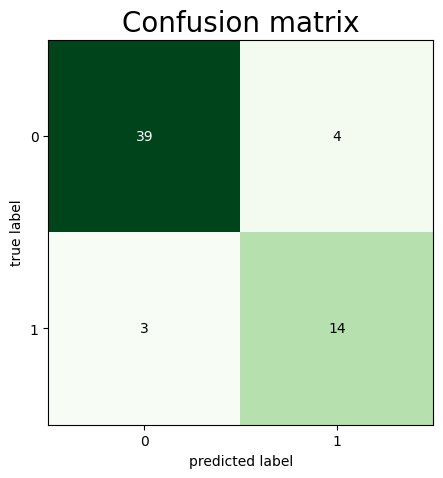

In [137]:
# plot_confusion_matrix() is a function from the mlxtend.plotting module that plots a confusion matrix as a heatmap. 
# It takes several arguments, including conf_mat which is the confusion matrix that I want to plot,
# figsize which specifies the size of the resulting figure, and cmap which is the colormap to use for the heatmap.

fig , ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5),cmap=plt.cm.Greens)


plt.title('Confusion matrix',fontsize=20)

plt.show()

In [138]:
# Area Under the Curve

# roc_auc_score is a function from the sklearn.metrics module used to calculate the area under the receiver operating characteristic (ROC) curve for a binary classification problem. 
# The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds. 
# The area under the ROC curve (AUC) is a measure of the performance of a binary classifier, with a higher AUC indicating better performance.
# roc_auc_score() is used to calculate the AUC for the predictions y_pred compared to the true labels y_test. The resulting AUC value is stored in a variable named auc.
auc = roc_auc_score(y_test, y_pred)

# This line of code uses string formatting to print the AUC value with two decimal places.
print('AUC: %f' %auc)

AUC: 0.865253


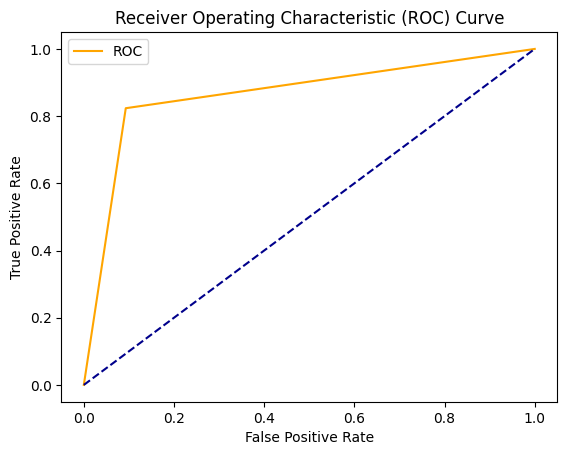

In [139]:
# This code is creating a Receiver Operating Characteristic (ROC) curve using the roc_curve() function from the scikit-learn library and plotting it using matplotlib.
# It calculates the false positive rate (FPR) and true positive rate (TPR) using the roc_curve() function.
# It takes as input the true labels (y_test) and the predicted probabilities (y_pred) and returns three arrays: fpr, tpr, and thresholds.
# The fpr and tpr arrays are assigned to the variables fpr and tpr, respectively. I only need the first two arrays, hence the [0:2] slice

fpr, tpr = roc_curve(y_test, y_pred)[0:2]
# This line plots the FPR on the x-axis and TPR on the y-axis using the plot() function from matplotlib. 
# The color parameter sets the color of the line to orange, and the label parameter sets the label of the line to 'ROC'.
plt.plot(fpr, tpr, color='orange', label='ROC')
# This line plots a dashed line at a 45-degree angle from the origin to the top-right corner of the plot.
# This represents a classifier that randomly guesses the class, and it helps me visualize how well my classifier is doing.
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# These lines add labels to the x and y axes, set the title of the plot to 'Receiver Operating Characteristic (ROC) Curve', add a legend, and display the plot. 
# The legend shows the label 'ROC' and indicates that the orange line represents the ROC curve.

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()